Vamos tentar visualizar o que está a acontecer na rede.
Primeiro as importações:

In [ ]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
#TensorFlow: Channels last order.
#Theano: Channels first order.
#CNTK: Channels last order.

In [ ]:
import matplotlib
#from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import imageio as im
from tensorflow.keras import layers, models, optimizers, metrics

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras import backend as K
#K.set_image_dim_ordering('tf') 
K.image_data_format() == 'channels_last'
from keras.utils import np_utils
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
#from keras.datasets import mnist


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp  'drive/My Drive/datasets/MODEL2/model2.tar.gz' 'model2.tar.gz'
!tar -xvf  'model2.tar.gz' 

Vamos carregar e visualizar os dados e fazer as devidas transformações

In [ ]:
# Etapa 1 - preparar o dataset

def get_dataset(PATH,categories):
    
    train = dict()
    test  = dict()
    
    for i in os.listdir(f'{PATH}/test'):
        
        
        train[i] = os.listdir(f'{PATH}/train/{i}/')
        test[i]  = os.listdir(f'{PATH}/test/{i}/')

    for i in train:
        print(f"train: {len(train[i])},test: {len(test[i])}")
        
    return (train,test)



PATH=r'./MODEL2'
categories = os.listdir(f"{PATH}/test/")
print(categories)
num_classes = len(categories)

train,test = get_dataset(PATH,categories)

image_height = 128
image_width = 128

print(train)
len_train = sum([len(train[x]) for x in train])
len_test = sum([len(test[x]) for x in test])
batch_size = 32

print(len_train)
print(len_test)

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(PATH+'/train',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')  #tb podia ser class_mode='categorical'

test_set = test_datagen.flow_from_directory(PATH+'/test',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='categorical')




X_train, y_train = training_set.next()
X_test, y_test = test_set.next()
##X_train, X_test, y_train, y_test, num_classes = data_preparation() 
    

['LEVEL1', 'LEVEL2', 'LEVEL3']
train: 2992,test: 748
train: 2992,test: 748
train: 2992,test: 748
{'LEVEL1': ['-8.544787078549723_-8.542545766735437_41.089803214808335_41.09160411428289.jpg', '-9.03563436587838_-9.033393054064094_39.51380031849011_39.515601710070776.jpg', '-7.778258438063874_-7.776017126249587_40.538701473119346_40.54050254517096.jpg', '-8.112213898392504_-8.109972586578218_41.262686988566706_41.26448783380688.jpg', '-9.16787176292126_-9.165630451106976_39.34446701130515_39.346268455478224.jpg', '-9.002014688664088_-8.999773376849802_39.31204092057767_39.31384237481483.jpg', '-8.152557511049654_-8.150316199235368_40.679183401453656_40.68098442955984.jpg', '-8.157040134678226_-8.15479882286394_39.55162942411495_39.55343080393821.jpg', '-8.517891336778291_-8.515650024964003_41.53280745654377_41.53460821696185.jpg', '-9.338211460807004_-9.335970148992716_38.78419077956377_38.78599239730095.jpg', '-9.367348514392724_-9.365107202578438_38.6959108283244_38.69771247334332.jpg'

o formato da imagem fica 28 pixels por 28 pixels com um canal.

Vamos construir a nossa rede CNN plus da aula 3:

In [ ]:
#model.save('mnist_cnn_plus.h5')
model = load_model('drive/My Drive/models/inception_v3_da_dataset2.hdf5')

X_test: (32, 128, 128, 3)
y_test: (32, 3)
Imagem: (128, 128, 3)


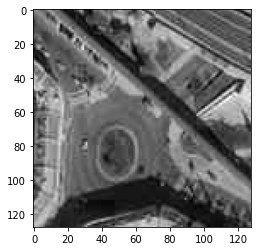

label: [0. 0. 1.]
antes do aumento de mais uma dimensão: (128, 128, 3)
depois do aumento de mais uma dimensão: (1, 128, 128, 3)
previsão: [[0.2908094  0.43481985 0.27437073]]


In [ ]:
# Visualizar imagem, label e correspondente previsão
def visualize_previsao(x_test, y_test, img_a_mostrar):
    print("X_test:",x_test.shape)
    print("y_test:",y_test.shape)
    print("Imagem:",x_test[img_a_mostrar].shape)
    plt.imshow(x_test[img_a_mostrar,:,:,0], cmap='gray')
    plt.show()
    print("label:",y_test[img_a_mostrar])
    print("antes do aumento de mais uma dimensão:",x_test[img_a_mostrar].shape)
    imagem_tensor = np.expand_dims(x_test[img_a_mostrar], axis=0)
    print("depois do aumento de mais uma dimensão:",imagem_tensor.shape)
    print("previsão:",model.predict(imagem_tensor))
    
    return imagem_tensor


imagem_tensor = visualize_previsao(X_test, y_test, 8)



As previsões estão corretas.

Vamos agora visualizar as ativações intermédias.

Segundo François Chollet no seu livro “DEEP LEARNING with Python”:

Ativações intermédias são “useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.”

A visualização de ativações intermédias consiste em mostrar os "feature maps" que de saida das diversas camadas convolucionárias de de pooling de uma rede, dada uma certa entrada, a saída de uma camada é geralmente denominada a sua ativação ou seja a siada da função de ativação. Isto permite a visualização de como a entrada é decomposta em diferentes filtros aprendidos pela rede. Cada canal codifica features relativamente independentes pelo que o modo mais adequado de visualizar estes feature maps é fazendo o display de cada canal como uma imagem 2D.

Vamos pegar uma imagem de teste de cada vez e visualizar as ativações por camada.

Para extrair os feature maps vamos criar um modelo keras que recebe batches de imagens como input e que da como output todos as ativações das camadas convolucionais e de pooling. Para isso vamos utilizar a classe Model do Keras. O modelo é instanciado usando dois argumentos: um tensor de input (ou lista de tensores de input) e um tensor de output (ou lista de tensors de output). A classe resultante é um modelo keras tal como os modelos sequencias, mapeando os inputs especificados para os outputs tambem especificados. O que diferenceia a classe Model é que ela permite modelos com multiplos outputs ao contrario do sequencial.

Instanciação de um modelo a partir de um tensor de input e uma lista de tensores de output:

In [ ]:
#Vamos buscar os outputs das primeira 5 (plus) camadas da rede ou 12 para a plus_plus
camadas_outputs = []
for layer in model.layers[:12]:
    print(layer.output.shape)
    camadas_outputs.append(layer.output)

# e depois criamos um modelo que retorna estes outputs dado os inputs do modelo
activation_model = models.Model(inputs=model.input, outputs=camadas_outputs) 

(None, 128, 128, 3)
(None, 63, 63, 32)
(None, 63, 63, 32)
(None, 63, 63, 32)
(None, 61, 61, 32)
(None, 61, 61, 32)
(None, 61, 61, 32)
(None, 61, 61, 64)
(None, 61, 61, 64)
(None, 61, 61, 64)
(None, 30, 30, 64)
(None, 30, 30, 80)


Dado o input de uma imagem, este modelo retorna os valores das camadas de ativação no modelo original.
Executar o modelo em modo de previsão:

In [ ]:
activations = activation_model.predict(imagem_tensor) 
# Retorna uma lista com dois Numpy arrays: um array por camada de ativação

Por exemplo esta é a ativação da primeira camada convolucionaria da imagem de input:

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)


(1, 128, 128, 3)


trata-se de um feature map de 24 × 24 com 30 channels. Vamos visualizar o 5º canal da ativação da ativação da priemira camada do modelo original.

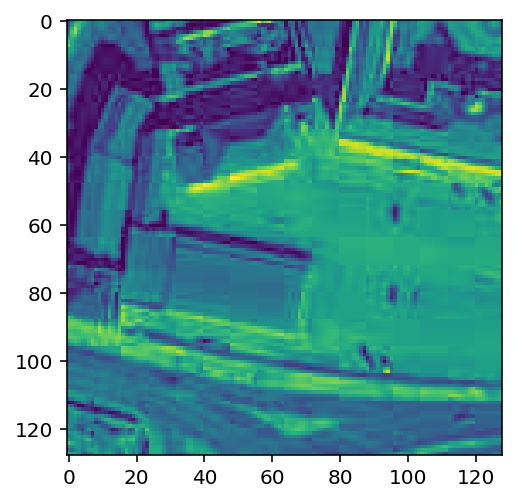

In [ ]:
plt.imshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

Para melhor compreensão vamos visualizar todas as ativações em todas as camadas:


nome_camada: input_1
n_features: 3
size: 128
n_linhas: 1
nome_camada: conv2d
n_features: 32
size: 63
n_linhas: 4
nome_camada: batch_normalization
n_features: 32
size: 63
n_linhas: 4
nome_camada: activation
n_features: 32
size: 63
n_linhas: 4
nome_camada: conv2d_1
n_features: 32
size: 61
n_linhas: 4
nome_camada: batch_normalization_1
n_features: 32
size: 61
n_linhas: 4
nome_camada: activation_1
n_features: 32
size: 61
n_linhas: 4
nome_camada: conv2d_2
n_features: 64
size: 61
n_linhas: 8
nome_camada: batch_normalization_2
n_features: 64
size: 61
n_linhas: 8
nome_camada: activation_2
n_features: 64
size: 61
n_linhas: 8


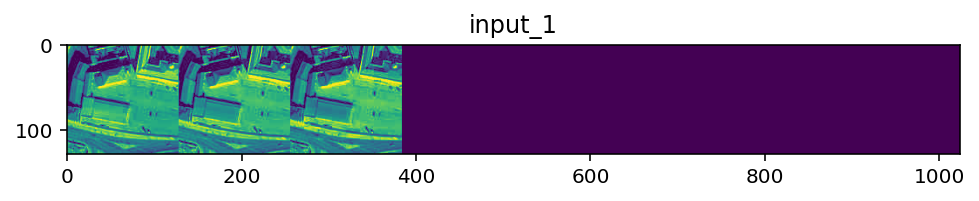

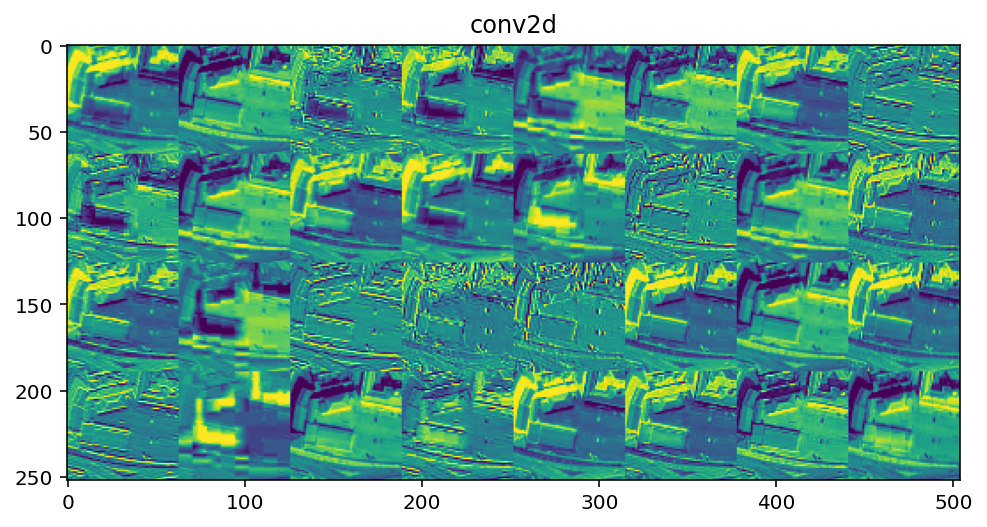

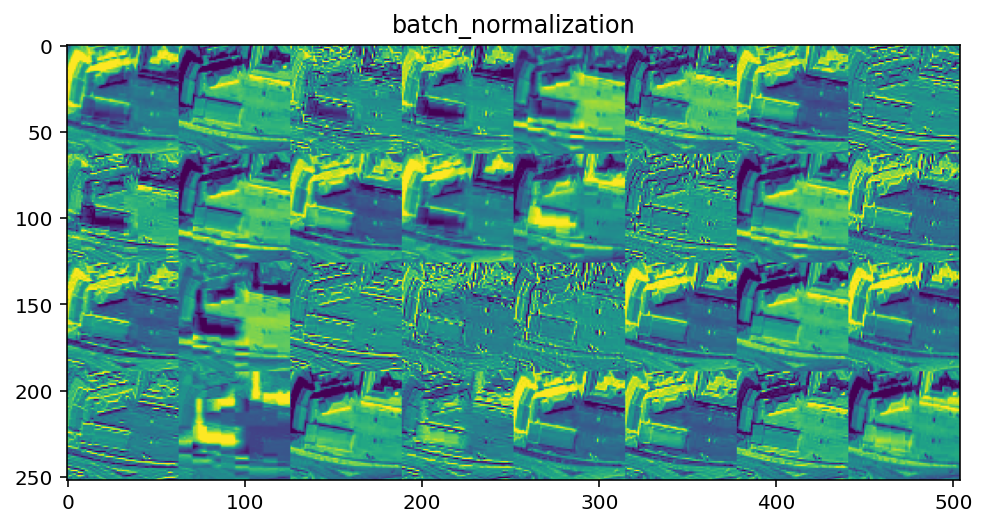

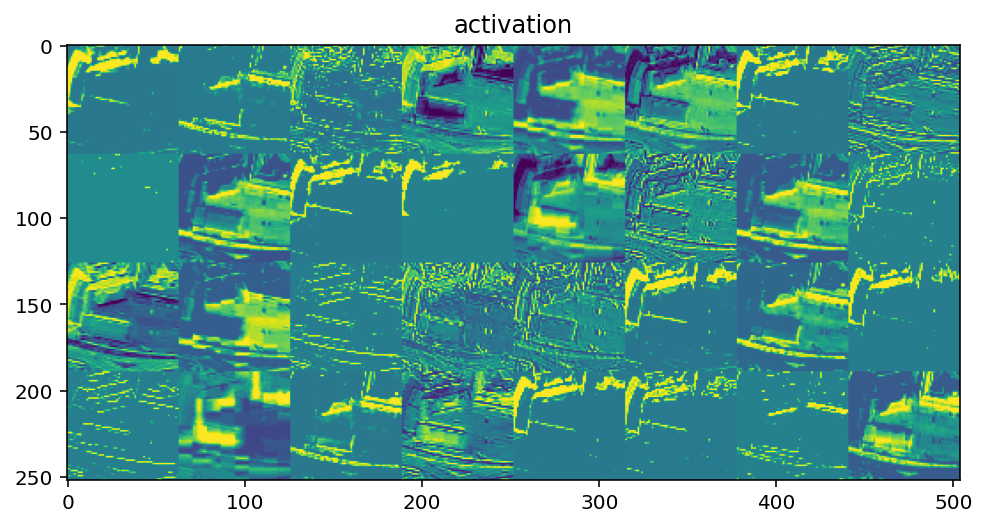

In [ ]:
nomes_camadas = []
for camada in model.layers[:10]:
    nomes_camadas.append(camada.name) # para puder colocar o nome da cada camada nas visualizações

imagens_por_linha = 8

for nome_camada, ativacao_camada in zip(nomes_camadas, activations): # o zip permite iterar simultaneamente em 2 listas
    n_features = ativacao_camada.shape[-1] # Numero de features no feature map, pois é o que está na ultima dimensão
    size = ativacao_camada.shape[1] #O feature map tem shape (1, tamanho, tamanho, numero_features).
    n_linhas = -(-n_features // imagens_por_linha) # Empilha os canais de ativação nesta matriz
    print("nome_camada:",nome_camada)
    print("n_features:",n_features)
    print("size:",size)
    print("n_linhas:",n_linhas)
    display_grid = np.zeros((size * n_linhas, imagens_por_linha * size))
    for col in range(n_linhas): # para fazer o display com 15 imagens por linha
        
        for lin in range(imagens_por_linha):
          try:
            #verificar aqui se a imagem existe
            imagem = ativacao_camada[0,:,:,col * imagens_por_linha + lin] #isto pode dar erro de out-of-range
            imagem -= imagem.mean() # pos-processamento para melhor visualização
            imagem /= imagem.std()
            imagem *= 64
            imagem += 128
            imagem = np.clip(imagem, 0, 255).astype('uint8') #valores <0 ficam 0 e >255 ficam = 255
            display_grid[col * size : (col + 1) * size,lin * size : (lin + 1) * size] = imagem
          except:
            break
            
              
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(nome_camada)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')            


Interpretação:

    As primeira camadas mantêm as formas da figura a classificar, embora algumas mantÊm pouca informação da imagem original. Nesta fase as ativações mantêm quase toda a informação da figura inicial.
    quanto mais se desce na estrutura as ativações tornam-se mais abstratas e menos interpretáveis visualmente. Começam a codificar conceitos de maior nivel tais com cantos curvas e angulos. Conceitos de maior nivel têm menos informação acerca do conteudo visual da imagem e mais da sua da classe a que pertence.
    As últimas camadas podem nem sequer activar pois a partir de certo ponto não há mais conceitos a aprender. Estes "dead filters" podem ser tambem um sintoma de learning rates muito altos. Trata-se tambem de uma indicação para cortar no número de Kernals e diminuir o tamanho do Modelo.